# Week 2 Notebook 5 Data Visualization

Now that we have been able to read in our data and perform some basic data exploration and wrangling, let's see how we can visualize it.

We are going to continue using the palmerpenguins data set to perform some data visualization using `matplotlib`.

In this notebook we will cover:
1. Getting started with Matplotlib
2. Creating Scatter Plots
3. Other plots
    * Pie Chart
    * Bar Chart

### Matplotlib

Matplotlib is a data science library for plotting data visualizations from simple to complex plots.

It contains the `pyplot` module which contains functions for basic plots, and this is how we will be creating our plots in this notebook.

Let's start by importing the `pyplot` module.

In [ ]:
# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# make the plots appear in this notebook
%matplotlib inline


Let's create a simple plot. Let's say we have some data about the monthly average daytime temperature (in Celcius) in New Delhi. 

The months data can be stored as a `tuple`, while the temperature values are stored as a `list`.

In [ ]:
# Define the data
month = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
temp = [21, 25, 31, 37, 40, 39, 36, 35, 34, 33, 28, 23]

We can plot this data very quickly using the pyplot `plot()` function by passing the data to the `x` and `y` arguments.


In [ ]:
# plot the data
plt.plot(month, temp)

Let's resize the figure, set the y-limits and put in some nice labels.
We will also use the `show()` function to show the plot, without showing the content of the last statement.

In [ ]:
# Plot nicely
plt.figure(figsize = (10, 3))     # size to 10 inches wide and 3 inches tall
plt.xlabel('Month')
plt.ylabel('Average Daily Temp')
plt.title('Temperature in New Delhi')
plt.plot(month, temp)             # Don't forget the data!
plt.ylim(10, 50)                  # set y-axis limits
plt.show()

We can also add markers to the plot, and change the linestyle and color.

In [ ]:
# Plot with different colors
plt.figure(figsize = (10, 3))     # size to 10 inches wide and 3 inches tall
plt.xlabel('Month')
plt.ylabel('Average Daily Temp')
plt.title('Temperature in New Delhi')
# show the markers and change the color and linestyle
plt.plot(month, temp, color = 'red', marker = 'h', linestyle = ':')
plt.ylim(10, 50)                  # set y-axis limit
plt.show()

You can try different markers, refer to the list here: https://matplotlib.org/stable/api/markers_api.html


For linestyles, refer to https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
    

## Plotting Penguins

Now let's try to plot the penguins data set. We will import `pandas` so that we can read in the data easily and perform some data exploration.

In [ ]:
# import pandas
import pandas as pd

# read in the data set, which is in the same directory as this notebook file
df = pd.read_csv('penguins_size.csv')

Check the data frame, to review what kind of data there is.

In [ ]:
df.head()

Looking at the data, it's not suitable to create a line plot as they are not in sequence. Let's see what happens if we try to plot the culmen lengths by the culmen depths. 

In [ ]:
# Create a line plot 

plt.figure(figsize = (5,3))
plt.plot(df['culmen_length_mm'], df['culmen_depth_mm'])
plt.show()


It looks rather messy! But we can actually see three "clumps" of data. The line plot just plots each x=culmen length and y = culmen depth value as a point (x,y) then draws a line to join one point to another. 

Let's remove the lines and just show the markers, using 'o' for a point and a space, 'o' for the linestyle.

In [ ]:
# Create a scatter plot using plot()

plt.figure(figsize = (5,3))
plt.plot(df['culmen_length_mm'], df['culmen_depth_mm'], marker = 'o', linestyle=' ')
plt.xlabel('culmen length in mm')
plt.ylabel('culmen depth in mm')
plt.show()

Instead of specifying the parameters `marker=`, `linestyle=` and '`color=`, we can use the shortcut by passing in a format string in the form `[marker][line][color]`, so the following two lines are equivalent:

* `plt.plot(df['culmen_length_mm'], df['culmen_depth_mm'], marker = 'o', linestyle=' ', color = 'b)`
* `plt.plot(df['culmen_length_mm'], df['culmen_depth_mm'], fmt = 'o b')`





In [ ]:
# Create a scatter plot using plot() and the format string 
# equivalent to marker = '*', linestyle = ' ', color = 'r' 

plt.figure(figsize = (5,3))
plt.plot(df['culmen_length_mm'], df['culmen_depth_mm'],'* r')
plt.xlabel('culmen length in mm')
plt.ylabel('culmen depth in mm')
plt.show()

### Plotting Different Data Sets in the Same Axes

As we can see from the plots above, there appears to be three groups of points. As there are three species of penguins, it would be interesting to see if the three groups correspond to the three species.

Let's execute the `value_counts()` function to view the three species of penguins:

In [ ]:
df['species'].value_counts()

We want to separate the original data set into three groups
* Adelie penguins
* Gentoo penguins
* Chinstrap penguins

Let's first filter the data frame so that we only select the penguins which are of species 'Adelie'.

In [ ]:
# use the boolean condition on the 'species' column to check which rows equal 'Adelie'
isAdelie = df['species'] == 'Adelie'
print(isAdelie)

# now select the rows where the condition is True and store in a new data frame
adPenguins = df[isAdelie]


When we print the contents of `isAdelie`, we get a data frame that only contains a column of Boolean values. The values are either `True` or `False` depending on whether the original data frame matched the condition that the column value is 'Adelie'.

Next, we used the `isAdelie` to only select the values which are `True`, and stored the results in a new data frame called `adPenguins`.

In [ ]:
# use the boolean condition on the 'species' column to check which rows equal 'Adelie'
isAdelie = df['species'] == 'Adelie'
print(isAdelie)

# now select the rows where the condition is True and store in a new data frame
adPenguins = df[isAdelie]

# check the species in the adPenguins data frame
print('\nChecking species count')
print(adPenguins['species'].value_counts())

As you can see, now there are only Adelie penguins in the data frame called `adPenguins`. Let's do the same for the Gentoo and Chinstrap penguins:

In [ ]:
# Gentoo Penguins
isGentoo = df['species']=='Gentoo'
gtPenguins = df[isGentoo]

# Chinstrap Penguins - combine the steps into one statement
csPenguins = df[df['species']=='Chinstrap']

Now that we have separated into three data frames, we can use the data from each into the same plot. 

In [ ]:
#plot the three types of penguins

plt.figure(figsize = (6,5))
# plot the Adelie Penguins data with green dots
plt.plot(adPenguins['culmen_length_mm'], adPenguins['culmen_depth_mm'], 'o g')

# plot the Gentoo Penguins data with blue squares
plt.plot(gtPenguins['culmen_length_mm'], gtPenguins['culmen_depth_mm'], 's b')

# plot the Chinstrap Penguins data with red hexagons
plt.plot(csPenguins['culmen_length_mm'], csPenguins['culmen_depth_mm'], 'h r')
plt.xlabel('Culmen Length in mm')
plt.ylabel('Culmen Depth in mm')
plt.title('Comparing Palmer Penguins Culmen Size')
plt.show()

Now we can see that the three groups do match the three penguin species. However, it is difficult to remember which set of points match which species. We need to add a legend, and also to make the points slightly transparent to view if there are any overlapping points.

In [ ]:
#plot the three types of penguins, with legend

plt.figure(figsize = (6,5))
# add legends by using the labels parameter and make alpha = 0.5 
plt.plot(adPenguins['culmen_length_mm'], adPenguins['culmen_depth_mm'], 'og ', alpha = 0.5, label = 'Adelie')
plt.plot(gtPenguins['culmen_length_mm'], gtPenguins['culmen_depth_mm'], 'sb ', alpha = 0.5, label = 'Gentoo')
plt.plot(csPenguins['culmen_length_mm'], csPenguins['culmen_depth_mm'], 'hr ', alpha = 0.5, label = 'Chinstrap')
plt.xlabel('Culmen Length in mm')
plt.ylabel('Culmen Depth in mm')
plt.title('Comparing Palmer Penguins Culmen Size')
plt.legend()

plt.show()

Now we can see clearly the points that represent each species type.

For example, we can see that Adelie penguins have lower values for culmen length than the other two species, but higher values for culmen depth than Gentoo penguins.

You can try the same plots with the other columns, `body_mass_g`, `flipper_length_mm` to explore if there are any differences in these.

Let's try some other types of plots.

## Pie Chart

A pie chart is used to visualize the percentage out of a total. However, it is usually not recommended for more than three categories. As we have exactly three species of penguins, we can try to visualize the proportions of each.

First, remember that we could view the count of each species using `value_counts()`. Let's store the results so that we can use them.

In [ ]:
# store the result of value counts
species_count = df['species'].value_counts()
print(type(species_count))


The `type` of species_count is series, and and we can extract the names of each of the species using the index of species_count as above.

In [ ]:
print(species_count)
print(species_count.index)

Now we can plot the pie chart:

In [ ]:
# Create a simple pie chart

# extract the names of the species from the species_count
species_names = species_count.index

# plot the pie and show data labels
plt.pie(species_count, labels = species_names, autopct='%.1f%%')
plt.title("Penguins Recorded")
plt.show()

We can enhance the pie chart by setting the colors for each penguin and exploding the slice which is the largest.



In [ ]:
# Enhancing pie chart with colors

# extract the names of the species from the species_count
species_names = species_count.index

# set colors
species_colors = ['palegreen', 'skyblue', 'firebrick']

# explode the first slice by 0.1
exp = (0.1, 0, 0)

# plot the pie and show data labels
plt.pie(species_count, labels = species_names, autopct='%.1f%%', colors = species_colors, explode = exp)
plt.title("Penguins Recorded")
plt.show()

View more colours here: https://matplotlib.org/stable/gallery/color/named_colors.html

### Bar Chart

An alternative to a pie chart is a bar chart, as it is provides a clearer comparison and can be used for multiple groups. 

Consider the simple bar chart to plot the count of each species of penguin.

In [ ]:
# Plotting the species_count data as a bar chart
# using the same colors defined above
plt.bar(species_count.index, species_count, color = species_colors)
plt.title("Penguins Recorded")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

A bar chart is also useful for comparing values within categories. 
For example, we could compare the mean body_mass of each species of penguin.

First we would have to use the `groupby()` function to calculate the mean body mass of each group of species.

In [ ]:
mean_body_mass = df.groupby(['species'])['body_mass_g'].mean()
print(mean_body_mass)

In [ ]:
# Using the same type of plot but with the mean_body_mass data
# using the same colors defined above
plt.bar(mean_body_mass.index, mean_body_mass, color = species_colors)
plt.title("Body Mass By Species")
plt.xlabel("Species")
plt.ylabel("Body Mass, gms")
plt.show()

Let's try to compare the weight for the males and females of each species. This means we would have to group by yet another level.

In the previous notebook we identified that there was an error with one of the values of sex, so we should correct it first.

In [ ]:
# identify the row where the sex was coded wrongly and set it to MALE
df.loc[df['sex'] == '.', 'sex'] = 'MALE'

# group by sex, then species
meanWeightBySex = df.groupby(['sex', 'species'])['body_mass_g'].mean()
# show the result
print(meanWeightBySex)

# unstack so that the species are the column headers
meanWeight = meanWeightBySex.unstack()
print(meanWeight)

Performing the `groupby()`, and then `unstack()` creates the data frame in the last output above, where the index is the sex, 'FEMALE' or 'MALE', and the columns are the species. 

An easy way to plot the bar chart now is to use the `plot.bar()` function on the **data frame** `meanWeight`. 

In [ ]:
# use the plot function on the data frame
meanWeight.plot.bar(color = species_colors)
plt.title('Mean Body Mass by Sex')
plt.show()

This automatically creates the legend with the correct columns. 

Now we can see that the females of the species have lower values of body mass than the males, but for Gentoo penguins even the females have higher body mass than the males of the other two species.

This is just the basics of matplotlib, there are many other types of plots and arrangements we can create but make sure you are familiar with the basic structure and ideas.

You can try to create the same plots by editing the data to be plotted or changing the other arguments. 

## Exercises

Let's try some exercises with the `Iris` data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read the data into a dataframe called irisdf
irisdf = pd.read_csv('iris_csv.csv')
irisdf.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Q1. Basic Scatter Plot**

Create a scatter plot with `sepallength` data on the x-axis and `sepalwidth` data on the y-axis, with red dots and no lines. 

Add a title and label the x-axis and y-axis accordingly.

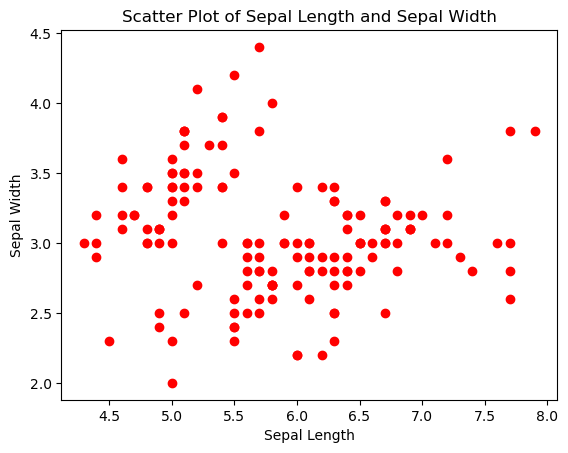

In [2]:
# Q1 answer
plt.scatter(irisdf['sepallength'], irisdf['sepalwidth'], color = 'red')
plt.title('Scatter Plot of Sepal Length and Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Let's use the `value_counts()` function to determine the number of `class` of Iris in the data frame.

In [3]:
irisdf['class'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

**Q2. Create Subsets** 

Separate the three classes into three data sets, `setosa`, `versicolor`, and  `virginica`

In [4]:
# Q2 answer
setosa_data = irisdf[irisdf['class'] == 'Iris-setosa']
versicolor_data = irisdf[irisdf['class'] == 'Iris-versicolor']
virginica_data = irisdf[irisdf['class'] == 'Iris-virginica']

**Q3. Create Scatter Plot**

Create the scatter plot to compare the `sepallength` and `sepalwidth` of the three clases. 

Make the points semi-transparent by setting an alpha value less than 1.

Add a legend to show the names of the three classes.

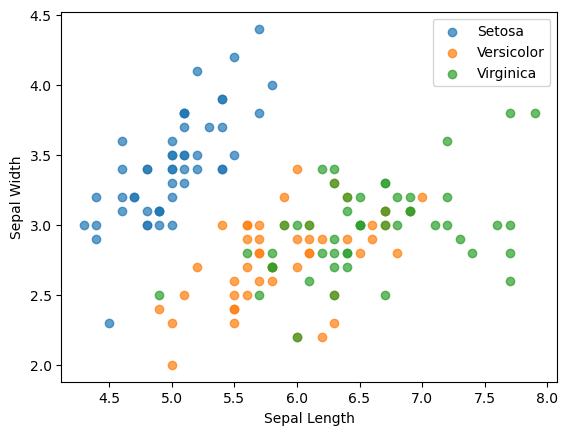

In [5]:
# Q3 answer
# Create/Membuat scatter plot
plt.scatter(setosa_data['sepallength'], setosa_data['sepalwidth'], label='Setosa', alpha=0.7)
plt.scatter(versicolor_data['sepallength'], versicolor_data['sepalwidth'], label='Versicolor', alpha=0.7)
plt.scatter(virginica_data['sepallength'], virginica_data['sepalwidth'], label='Virginica', alpha=0.7)

# Menambahkan legenda
plt.legend()

# Menambahkan label sumbu
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Menampilkan plot
plt.show()